<a href="https://colab.research.google.com/github/Chirag314/EDA/blob/main/Practise_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
# Load inbuilt dataset 'tips'
tips=sns.load_dataset('tips')
type(tips)

pandas.core.frame.DataFrame

In [2]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [3]:
features=tips.columns.tolist()
features

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
total_bill,244.000000,19.785943,8.902412,3.070000,13.347500,17.795000,24.127500,50.810000
tip,244.000000,2.998279,1.383638,1.000000,2.000000,2.900000,3.562500,10.000000
size,244.000000,2.569672,0.951100,1.000000,2.000000,2.000000,3.000000,6.000000


NameError: ignored

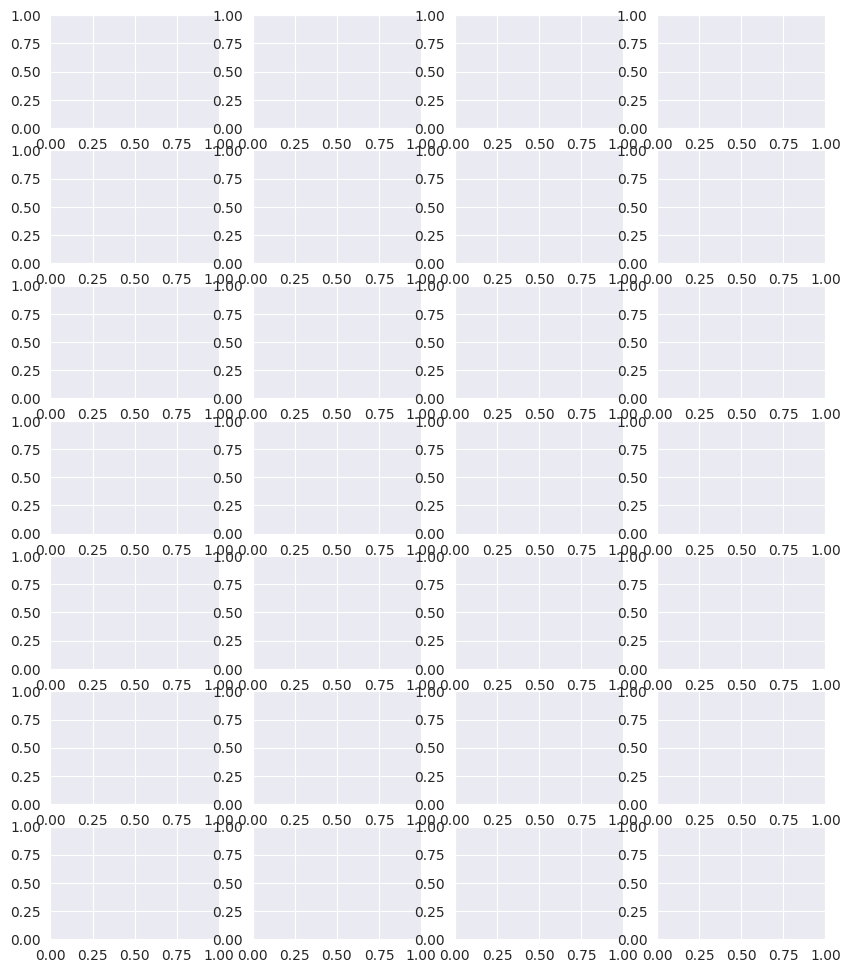

In [8]:
#Draw vertical red line for min and max values and outliar detection.
fig, axs = plt.subplots(7, 4, figsize=(10, 12))
axs = axs.ravel()
for ax, f in zip(axs, float_features):
    ax.hist(train[f], bins=120, density=True)
    ax.set_xlabel(f)
    ax.set_ylabel('density')
    ax.axvline(test[f].min(), color='r')
    ax.axvline(test[f].max(), color='r')
plt.tight_layout()
plt.show()

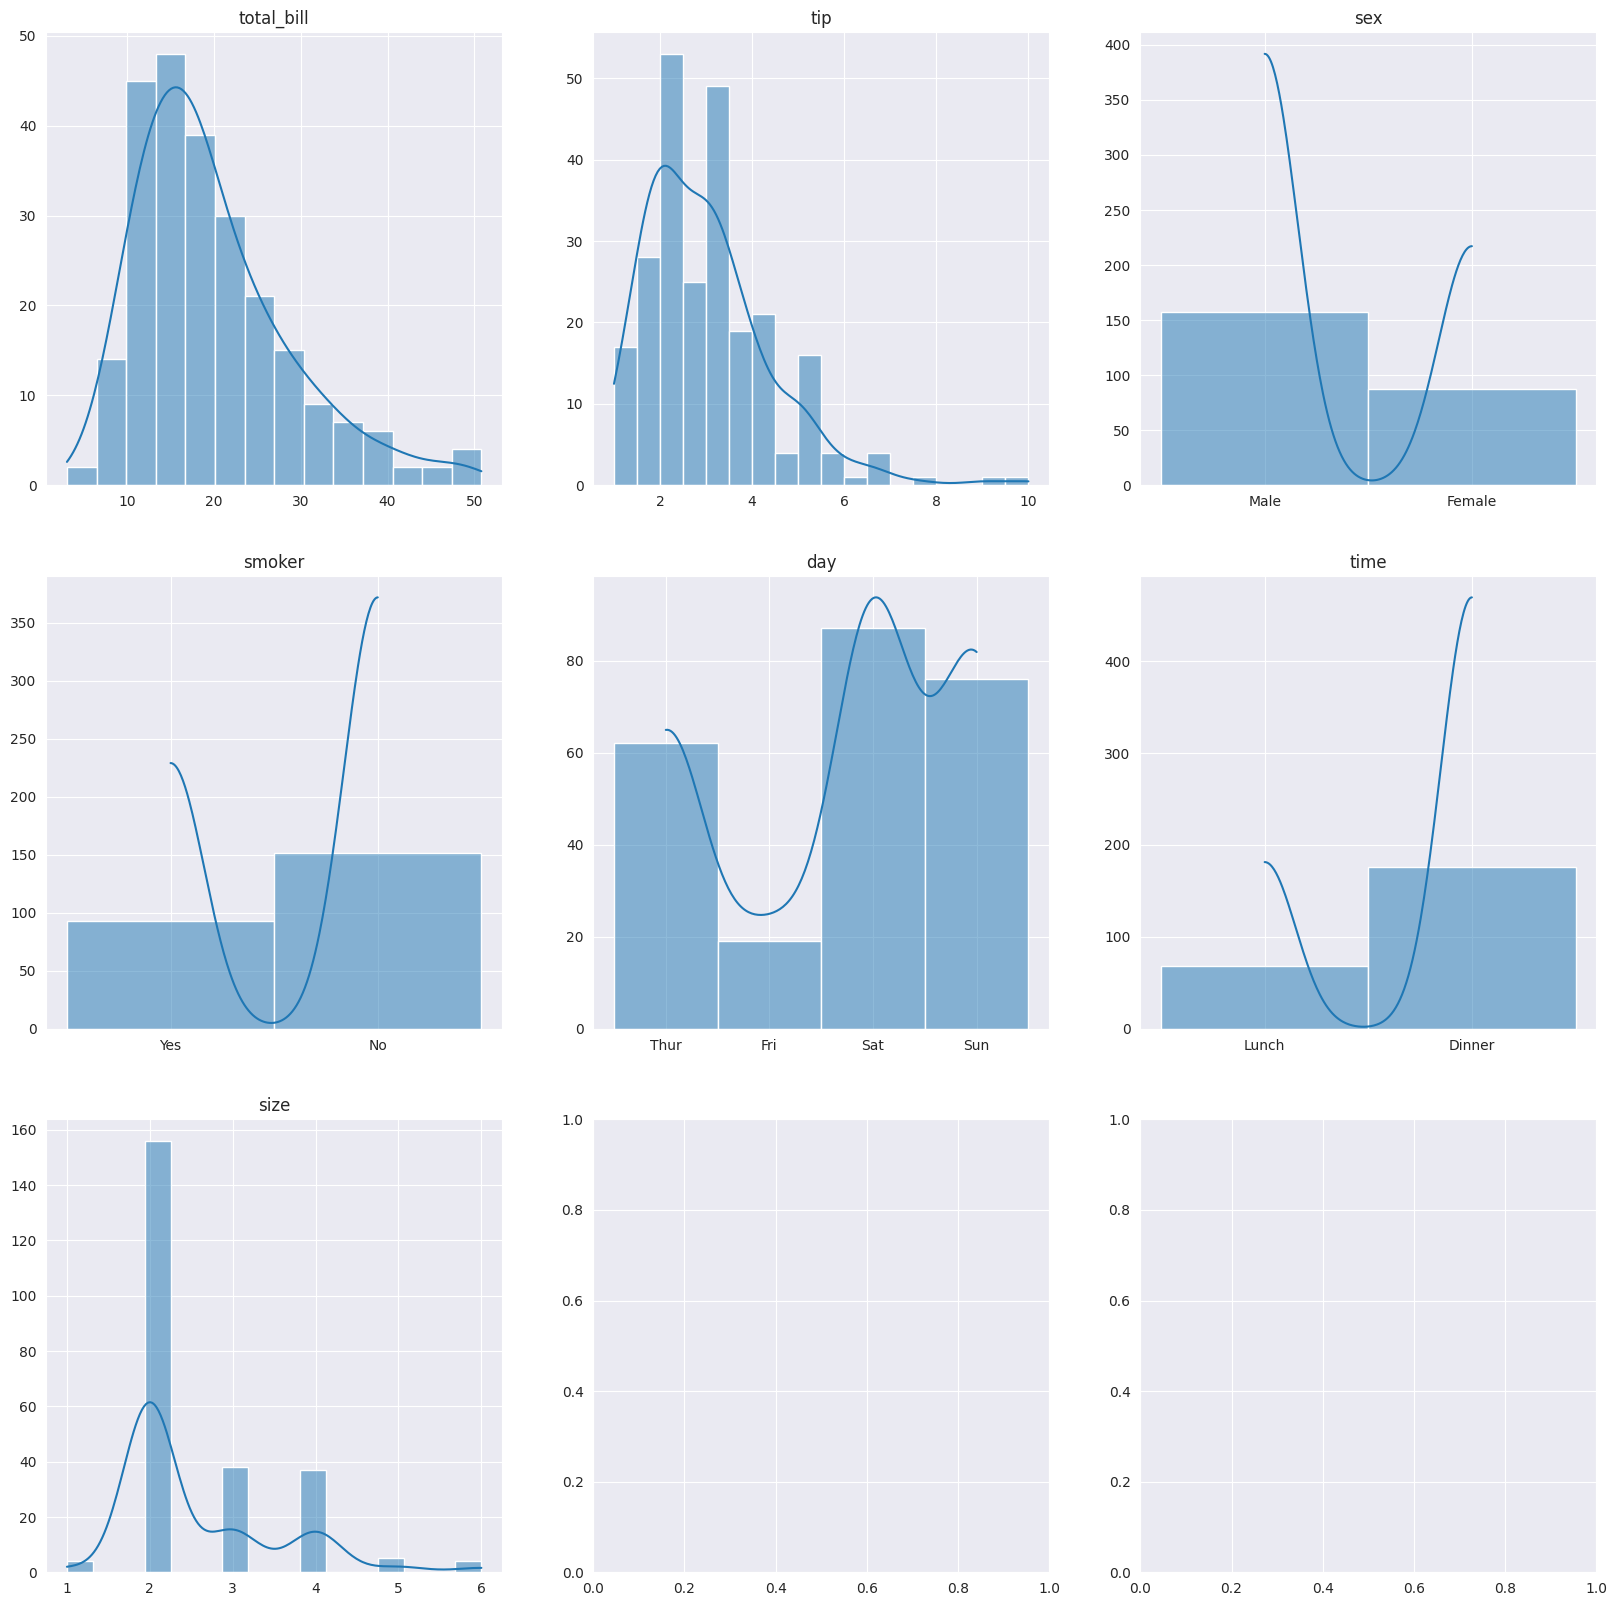

In [9]:
import matplotlib.pyplot as plt
fig,axe=plt.subplots(nrows=3,ncols=3,figsize=(20,20))
axe=axe.flatten()
sns.set_style('darkgrid')

axis_counter=0
for feature in features:
  ax=axe[axis_counter]
  _=sns.histplot(data=tips,x=feature,kde=True,ax=ax)
  _=ax.set_title("{}".format(feature))
  _=ax.set_ylabel("")
  _=ax.set_xlabel("")
  #ax.axvline(tips[feature].min,color='r')
  #ax.axvline(tips[feature].max,color='r')
  axis_counter+=1


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

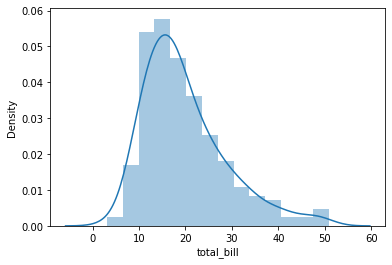

In [ ]:
# lets check how total bill is distributed
sns.distplot(tips['total_bill'])
#sns.distplot(tips['tip']) # Dislplay tip also on same plot

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip'>

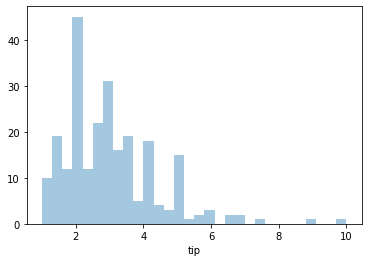

In [ ]:
# Always select balanced number for bin size. Too big number will result in a plot of every single instance
sns.distplot(tips['tip'],kde=False,bins=30)

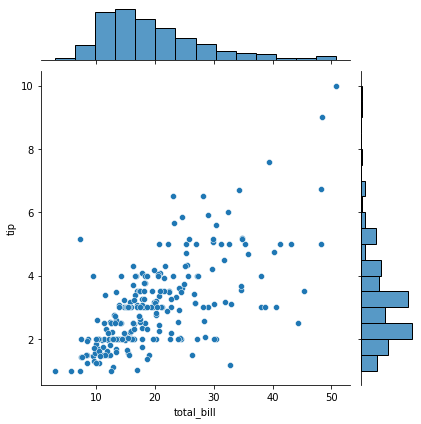

In [ ]:
# Joint plot for comparison.
sns.jointplot(x='total_bill',y='tip',data=tips)# kind=scatter' by default


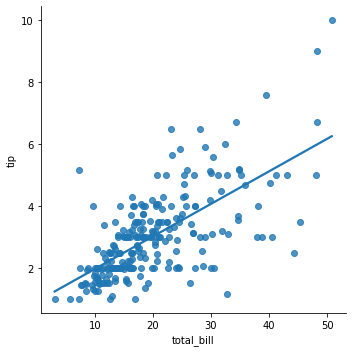

In [ ]:
# lmplot for comparison.
sns.lmplot(x='total_bill',y='tip',data=tips,ci=None)# kind=scatter' by default
#plt.show()

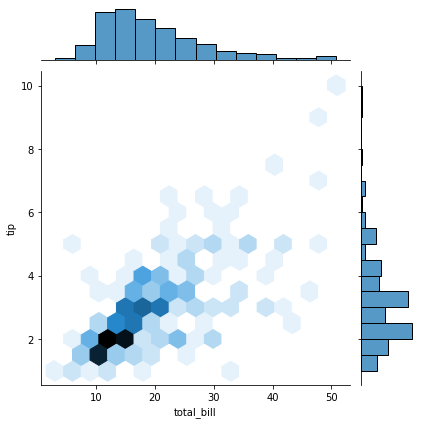

In [ ]:
# HExagon plot .. Darker the color, more points in the hexagon
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

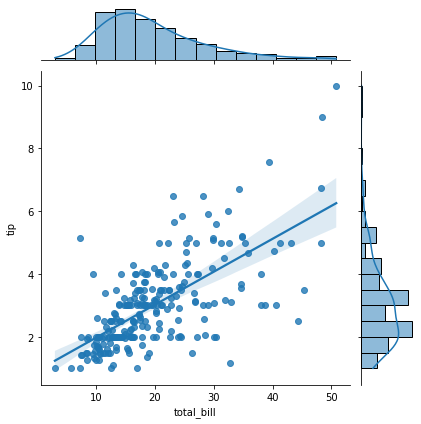

In [ ]:
# Regression plot
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

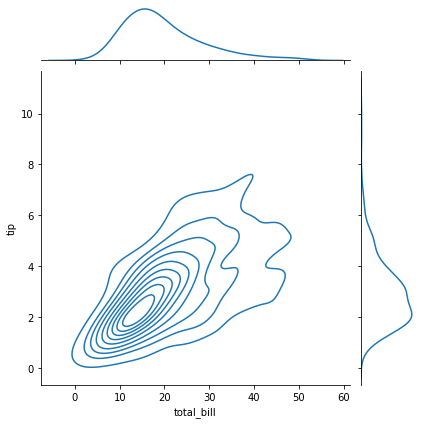

In [ ]:
#kde plot
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

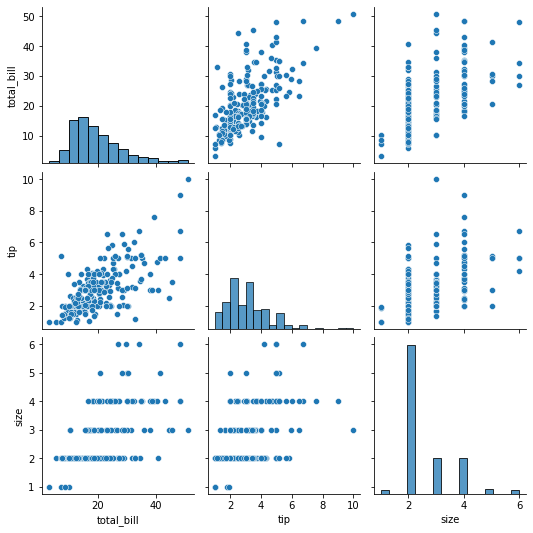

In [ ]:
## Pairplot :- Multiple paiwise bivariate distribution in a dataset togeter on a single canvass.Only for numerical columns
sns.pairplot(tips)

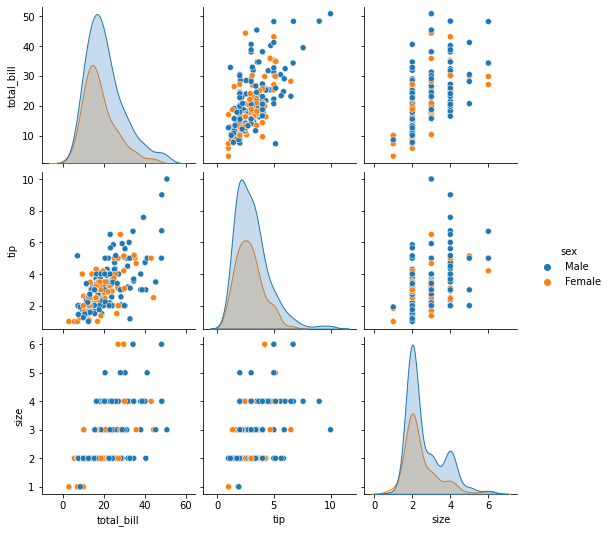

In [ ]:
# Adding a categorical column as a hue in pairwise

sns.pairplot(tips,hue='sex')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

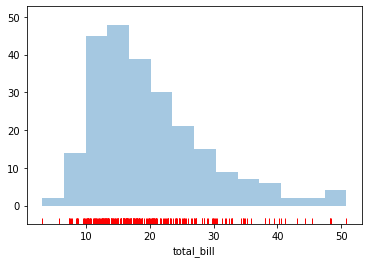

In [ ]:
# Rugplot. just plot sticks on an axis . They are building blocks of kde plots
sns.rugplot(tips['total_bill'],color='r')
sns.distplot(tips['total_bill'],kde=False)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

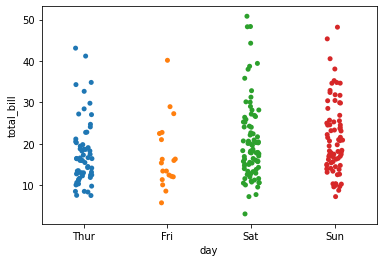

In [ ]:
# Categorical plots

#scatterplot
sns.stripplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

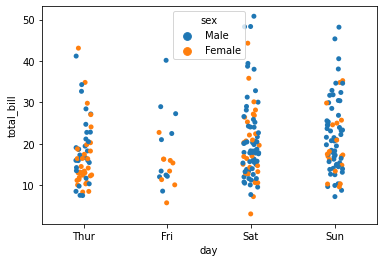

In [ ]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex')

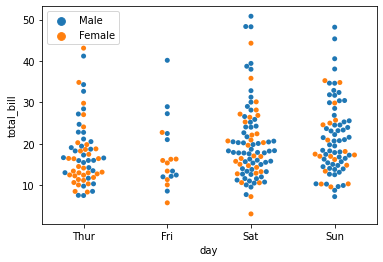

In [ ]:
# Swarmplot
ax=sns.swarmplot(x='day',y='total_bill',data=tips,hue='sex')
ax.legend(loc=2)

<AxesSubplot:xlabel='total_bill', ylabel='day'>

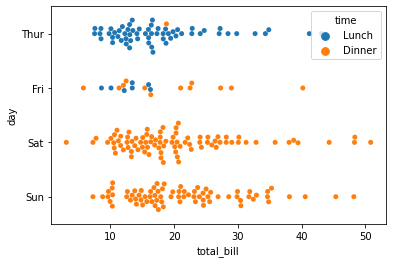

In [ ]:
#put categorical variable on vertical axis
sns.swarmplot(x='total_bill',y='day',hue='time',data=tips)
# From this we can see that almost all customer go for lunch on Thursday and dinner on weekends. They didnt go much on Fridays.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

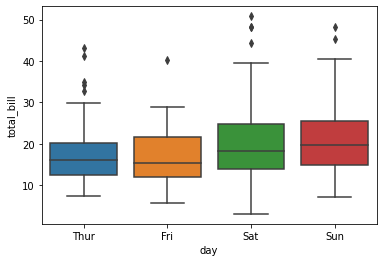

In [ ]:
#Boxplot to find out distribution of categorical data
sns.boxplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

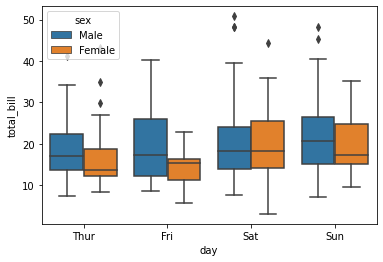

In [ ]:
# Check with respect to sex
sns.boxplot(x='day',y='total_bill',data=tips,hue='sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

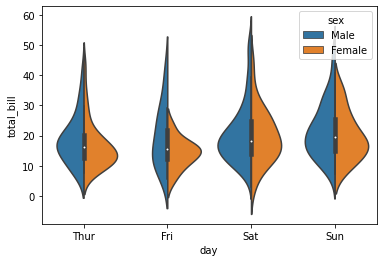

In [ ]:
# Check violin plot
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

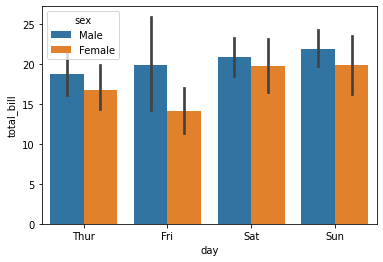

In [ ]:
# Categorical estimation plots
# barplots
sns.barplot(x='day',y='total_bill',hue='sex',data=tips)

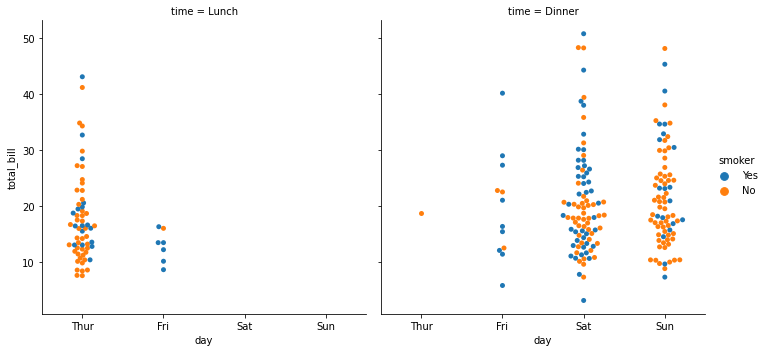

In [ ]:
# Catplot

sns.catplot(x='day',y='total_bill',hue='smoker',col='time',data=tips,kind='swarm')

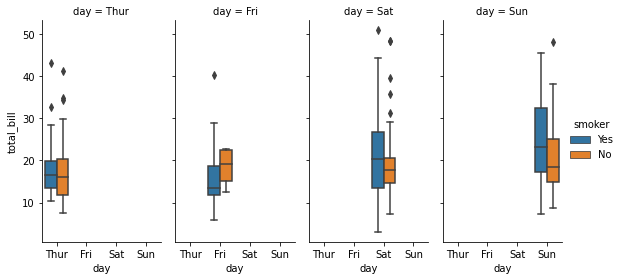

In [ ]:
# try kind=box and col=day

sns.catplot(x='day',y='total_bill',hue='smoker',col='day',data=tips,kind='box',height=4,aspect=0.5)

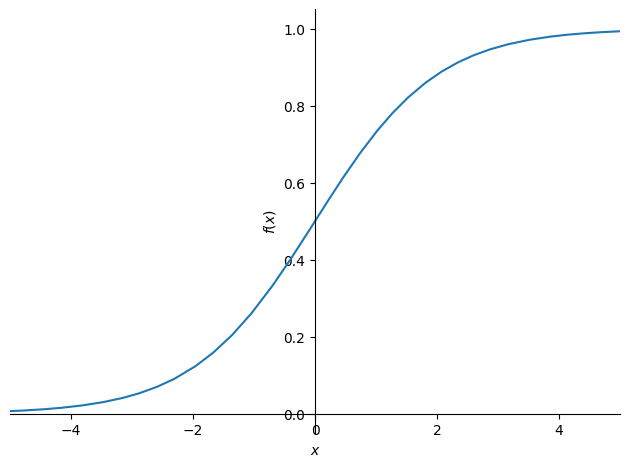

In [ ]:
# draw plots of loss functions import symbolic python, very good library
import sympy
sympy.plot('1/(1+exp(-x))',xlim=(-5 , 5))

In [ ]:
# World choropleth map
# Use world GDP data and plot on map
import pandas as pd
gdp=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
gdp.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot
# Data dictionary
data=dict(type='choropleth',
          locations=gdp['CODE'],
          z=gdp['GDP (BILLIONS)'],
          text=gdp['COUNTRY'],
          colorbar={'title':'GDP Billions US'})

#layout
layout = dict(
    title= '2014 Global GDP',
    geo=dict(
    showframe=False,
    projection = {'type':'mercator'}
    )
)

# Finally plot
choromap = go.Figure(data=[data], layout=layout)
iplot(choromap)

In [ ]:
#Mosaic plot to plot confusion matric
from statsmodel.graphics.mosaicplot import mosaic
mosaic(confusion_matrix)

In [ ]:
#Pandas time series.


fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate the point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={'arrowstyle':'->', 'color':'gray'})

plt.show()

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
df = pd.read_csv("titanic.csv")

# print the first few rows of the DataFrame
print(df.head())

# print the DataFrame's shape
print(df.shape)

# print the DataFrame's data types
print(df.dtypes)

# check for missing values
print(df.isnull().sum())

# visualize the distribution of a numeric column
plt.hist(df['Age'])
plt.show()

# visualize the distribution of a categorical column
df['Sex'].value_counts().plot(kind='bar')
plt.show()

# calculate basic statistics for all columns incluing object
print(df.describe(include='object'))
# calculate basic statistics for a numeric column
print(df['Fare'].describe())

# calculate the correlation between two numeric columns
print(df['Fare'].corr(df['Survived']))

# group the data by a categorical column and calculate statistics
grouped_df = df.groupby('Pclass')['Survived'].mean()
print(grouped_df)

# create a scatter plot to visualize the relationship between two numeric columns
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# create a box plot to visualize the distribution of a numeric column
plt.boxplot(df['Fare'])
plt.ylabel('Fare')
plt.show()

# create a bar plot to visualize the mean of a numeric column for each category of a categorical column
df.groupby('Sex')['Age'].mean().plot(kind='bar')
plt.ylabel('Average Age')
plt.show()

# create a pivot table to summarize the data
pivot_table = df.pivot_table(index='Sex', columns='Pclass', values='Fare', aggfunc='mean')
print(pivot_table)

# create a heatmap to visualize the pivot table
plt.pcolor(pivot_table, cmap='Reds')
plt.colorbar()
plt.show()

# create a pairplot to visualize the relationships between multiple numeric columns
import seaborn as sns
sns.pairplot(df, vars=['Age', 'Fare', 'SibSp'])
plt.show()

# create a bar plot to visualize the count of a categorical column
df['Embarked'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

# create a countplot to visualize the count of a categorical column by the categories of another categorical column
sns.countplot(x='Sex', hue='Pclass', data=df)
plt.show()

# create a point plot to visualize the mean of a numeric column by the categories of a categorical column
sns.pointplot(x='Sex', y='Age', data=df)
plt.ylabel('Average Age')
plt.show()

# create a violin plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.violinplot(x='Sex', y='Age', data=df)
plt.ylabel('Age')
plt.show()

# create a box plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.boxplot(x='Sex', y='Age', data=df)
plt.ylabel('Age')
plt.show()

# create a swarm plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.swarmplot(x='Sex', y='Age', data=df)
plt.ylabel('Age')
plt.show()

# create a faceting grid to visualize the distribution of multiple numeric columns by the categories of a categorical column
g = sns.FacetGrid(df, col='Sex')
g.map(plt.hist, 'Age')
plt.show()

# create a heatmap to visualize the correlation between multiple numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
plt.show()

# create a lag plot to check for autocorrelation in a numeric column
from pandas.plotting import lag_plot
lag_plot(df['Fare'])
plt.show()

# create an autocorrelation plot to visualize the autocorrelation in a numeric column
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Fare'])
plt.show()

# create a scatter plot matrix to visualize the relationships between multiple numeric columns
from pandas.plotting import scatter_matrix
scatter_matrix(df[['Age', 'Fare', 'SibSp']], alpha=0.2, figsize=(6, 6))
plt.show()

# create a regression plot to visualize the relationship between two numeric columns
sns.regplot(x='Age', y='Fare', data=df)
plt.show()

# create a barplot to visualize the mean of a numeric column by the categories of a categorical column
sns.barplot(x='Sex', y='Age', data=df)
plt.ylabel('Average Age')
plt.show()

# create a pointplot to visualize the mean and confidence interval of a numeric column by the categories of a categorical column
sns.pointplot(x='Sex', y='Age', data=df, ci=95)
plt.ylabel('Average Age')
plt.show()

# create a lmplot to visualize the relationship between two numeric columns and the categories of a categorical column
sns.lmplot(x='Age', y='Fare', hue='Sex', data=df)
plt.show()

# create a factorplot to visualize the distribution of a numeric column by the categories of a categorical column
sns.factorplot(x='Sex', y='Age', data=df)
plt.ylabel('Average Age')
plt.show()

# create a boxenplot to visualize the distribution of a numeric column by the categories of a categorical column
sns.boxenplot(x='Sex', y='Age', data=df)
plt.ylabel('Age')
plt.show()

# create a distplot to visualize the distribution of a numeric column
sns.distplot(df['Fare'])
plt.show()

# create a kdeplot to visualize the kernel density estimate of a numeric column
sns.kdeplot(df['Fare'])
plt.show()

# create a rugplot to visualize the distribution of a numeric column
sns.rugplot(df['Fare'])
plt.show()

# create a jointplot to visualize the relationship between two numeric columns and their distributions
sns.jointplot(x='Age', y='Fare', data=df)
plt.show()

In [ ]:
# create a copy of the original DataFrame
df_preprocessed = df.copy()

# handle missing values in the DataFrame
df_preprocessed['Age'].fillna(df_preprocessed['Age'].median(), inplace=True)
df_preprocessed.dropna(inplace=True)

# encode categorical variables using one-hot encoding
df_preprocessed = pd.get_dummies(df_preprocessed, columns=['Sex', 'Pclass'], prefix=['sex', 'pclass'])

# standardize the values of a numeric column
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_preprocessed['Age_scaled'] = scaler.fit_transform(df_preprocessed[['Age']])

# normalize the values of a numeric column
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
df_preprocessed['Age_normalized'] = normalizer.fit_transform(df_preprocessed[['Age']])

# bin the values of a numeric column
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal')
df_preprocessed['Age_binned'] = discretizer.fit_transform(df_preprocessed[['Age']])

# apply a min-max scaling to a numeric column
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_preprocessed['Age_scaled'] = scaler.fit_transform(df_preprocessed[['Age']])

# apply a robust scaling to a numeric column
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_preprocessed['Age_scaled'] = scaler.fit_transform(df_preprocessed[['Age']])

# apply a power transformation to a numeric column
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')
df_preprocessed['Age_transformed'] = transformer.fit_transform(df_preprocessed[['Age']])

# apply a quantile transformation to a numeric column
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(output_distribution='normal')
df_preprocessed['Age_transformed'] = transformer.fit_transform(df_preprocessed[['Age']])

# apply a box-cox transformation to a numeric column
from scipy.stats import boxcox

df_preprocessed['Age_transformed'], lambda_ = boxcox(df_preprocessed['Age'])

In [ ]:
# calculate summary statistics for a numeric column
print(df_preprocessed['Age'].describe())

# calculate the skewness and kurtosis of a numeric column
print(df_preprocessed['Age'].skew())
print(df_preprocessed['Age'].kurtosis())

# calculate the correlation between two numeric columns
print(df_preprocessed['Age'].corr(df['Fare']))

# perform a t-test to compare the means of two numeric columns
from scipy.stats import ttest_ind

t, p = ttest_ind(df_preprocessed['Age'], df_preprocessed['Fare'])
print(t, p)

# perform an ANOVA test to compare the means of two or more numeric columns
from scipy.stats import f_oneway

f, p = f_oneway(df_preprocessed['Age'], df_preprocessed['Fare'])
print(f, p)

# perform a Mann-Whitney U test to compare the distribution of two numeric columns
from scipy.stats import mannwhitneyu

u, p = mannwhitneyu(df_preprocessed['Age'], df_preprocessed['Fare'])
print(u, p)

# perform a Kruskal-Wallis H test to compare the distribution of two or more numeric columns
from scipy.stats import kruskal

h, p = kruskal(df_preprocessed['Age'], df_preprocessed['Fare'])
print(h, p)

# perform a Wilcoxon signed-rank test to compare the distribution of two paired numeric columns
from scipy.stats import wilcoxon

w, p = wilcoxon(df_preprocessed['Age'], df_preprocessed['Fare'])
print(w, p)